In [472]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [473]:
class Perceptron:
    def __init__(self, learning_rate = 1, n_epochs = 100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.theta = None
        self.theta0 = None
        
    def model_fit(self, X, Y):
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)
        self.theta0 = 0
        perceptron_loss = np.zeros(self.n_epochs)
        classification_loss = np.zeros(self.n_epochs)
        for i in range(self.n_epochs):
            for idx, x in enumerate(X):
                linear_output = np.dot(x, self.theta) + self.theta0
                y_predicted = np.where(linear_output>=0, 1, -1)
                if Y[idx]*y_predicted <= 0:
                    perceptron_loss[i] += (Y[idx]*(np.matmul(X[idx], self.theta) + self.theta0))
                    classification_loss[i] += np.heaviside(((np.matmul(X[idx], self.theta) + self.theta0) * Y[idx])*-1,-1)
                update_theta = self.learning_rate * (Y[idx] - y_predicted)
                self.theta += update_theta * x
                self.theta0 += update_theta
        return perceptron_loss, classification_loss

In [474]:
from scipy import io

Dataset_MATLAB = io.loadmat('data3.mat')
data = pd.DataFrame(Dataset_MATLAB['data'])
X = data.iloc[:,:2].to_numpy()
Y = data.iloc[:,2:].to_numpy()

In [475]:
p = Perceptron(learning_rate = 1, n_epochs = 250)
perc_loss, classification_loss = p.model_fit(X, Y)
perc_loss = (-1*perc_loss)/len(X)
classification_loss = classification_loss/len(X)

<function matplotlib.pyplot.show(close=None, block=None)>

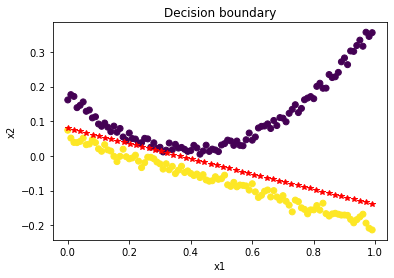

In [483]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', c=Y)

for i in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
    slope = -(p.theta0/p.theta[1])/(p.theta0/p.theta[0]) 
    intercept = -p.theta0/p.theta[1]

    y = (slope*i) + intercept
    plt.plot(i, y,'r*')
    
    plt.title('Decision boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')


plt.show

Text(0, 0.5, 'Perceptron error')

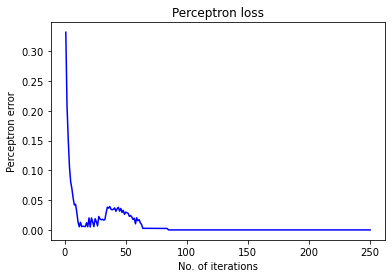

In [477]:
fig = plt.figure()

iterations = np.arange(1,251)
plt.plot(iterations, perc_loss, 'b')

plt.title('Perceptron loss')
plt.xlabel('No. of iterations')
plt.ylabel('Perceptron error')

Text(0, 0.5, 'Binary classification error')

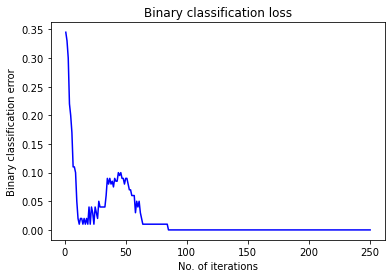

In [478]:
fig = plt.figure()

iterations = np.arange(1,251)
plt.plot(iterations, classification_loss, 'b')
plt.title('Binary classification loss')
plt.xlabel('No. of iterations')
plt.ylabel('Binary classification error')